In [1]:
# cd("z:\\home\\Vandy\\code\\julia\\SLMTools\\examples")
cd("z:\\home\\Vandy\\code\\julia")
# using SLMTools
using Pkg
println("Current environment path: ", Pkg.project().path)
Pkg.activate("C:\\Users\\micha\\.julia\\environments\\v1.9\\Project.toml")
println("Current environment path: ", Pkg.project().path)

Current environment path: \\srsrv1\lab\home\Vandy\code\julia\SLMTools\Project.toml


Current environment path: C:\Users\micha\.julia\environments\v1.9\Project.toml


  Activating project at `C:\Users\micha\.julia\environments\v1.9`


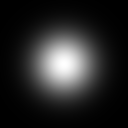

In [1]:
using SLMTools, Images, Statistics, Plots
N = 1024
NSLM = 1024
sz = (10, 10)
sigma = 0.5
beam0 = lfGaussian(Intensity, (N, N), 5.0)
dsbeam0 = downsample(beam0, 8) # Make a 8x downsampled image
p1 = look(dsbeam0)

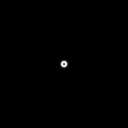

In [48]:
target = lfRing(Intensity, (N, N), 0.5, 0.25)
p2 = look(target)
dstarget = downsample(target, 8)
p3 = look(dstarget)

In [49]:
L = natlat((128, 128))
phi1 = otPhase(dsbeam0, dstarget, 0.0005)
beam_out = sft(sqrt.(dsbeam0.data) .* exp.(2pi * im * phi1.data)) .^ 2 |> nabs;
beam0_out = sft(sqrt.(dsbeam0.data) .* exp.(0*2pi * im * phi1.data)) .^ 2 |> nabs;
LFout = LatticeField{Intensity}(beam_out, dsbeam0.L);
LF0out = LatticeField{Intensity}(beam0_out, dsbeam0.L);
# p7 = look(dsbeam0, LF0out, dstarget, phi1, LFout)

128×128 Matrix{Float64}:
 9.18699e-22  9.54692e-22  1.0631e-21   …  1.0631e-21   9.54692e-22
 9.54691e-22  9.92094e-22  1.10475e-21     1.10475e-21  9.92094e-22
 1.0631e-21   1.10475e-21  1.23019e-21     1.23019e-21  1.10475e-21
 1.24522e-21  1.294e-21    1.44094e-21     1.44094e-21  1.294e-21
 1.50324e-21  1.56214e-21  1.73952e-21     1.73952e-21  1.56214e-21
 1.8403e-21   1.9124e-21   2.12955e-21  …  2.12955e-21  1.9124e-21
 2.2605e-21   2.34906e-21  2.6158e-21      2.6158e-21   2.34906e-21
 2.76903e-21  2.87751e-21  3.20426e-21     3.20426e-21  2.87751e-21
 3.37226e-21  3.50438e-21  3.90231e-21     3.90231e-21  3.50438e-21
 4.07784e-21  4.2376e-21   4.71879e-21     4.71879e-21  4.2376e-21
 ⋮                                      ⋱               
 4.07784e-21  4.2376e-21   4.71879e-21     4.71879e-21  4.2376e-21
 3.37226e-21  3.50438e-21  3.90231e-21  …  3.90231e-21  3.50438e-21
 2.76903e-21  2.87751e-21  3.20426e-21     3.20426e-21  2.87751e-21
 2.2605e-21   2.34906e-21  2.6158e-21  

LatticeField{Intensity, Float64, 2}
Lattice: (-15.890625:0.25:15.859375, -15.890625:0.25:15.859375)


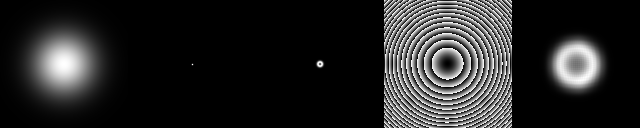

In [50]:
p7 = look(dsbeam0, LF0out, dstarget, phi1, LFout)

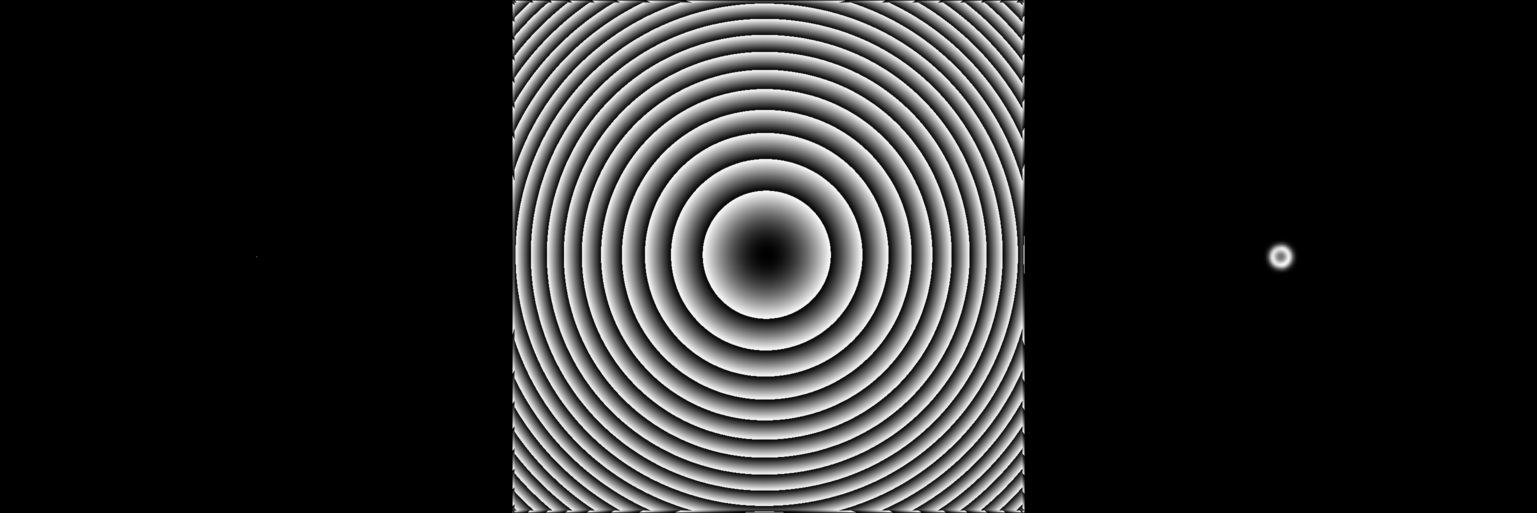

In [54]:
phi2 = upsample(phi1, 8);
beam_out_big = sft(sqrt.(beam0.data) .* exp.(2pi * im * phi2.data)) .^ 2|> nabs;
beam0_out_big = sft(sqrt.(beam0.data) .* exp.(0*2pi * im * phi2.data)) .^ 2 |> nabs;
LF0_out_big = LatticeField{Intensity}(beam0_out_big, beam0.L);
LF_out_big = LatticeField{Intensity}(beam_out_big, beam0.L);
p7 = look(LF0_out_big,phi2, LF_out_big)

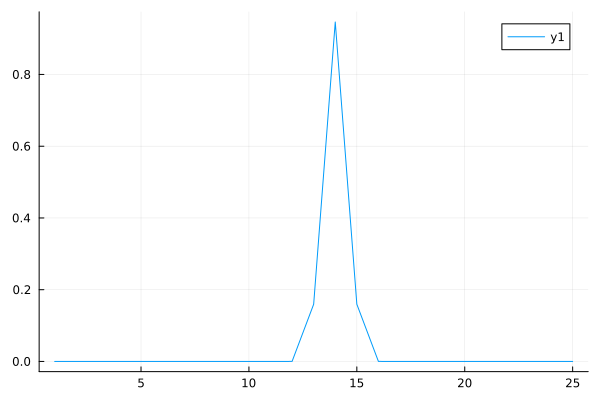

In [58]:
plot(beam0_out_big[513,500:524])

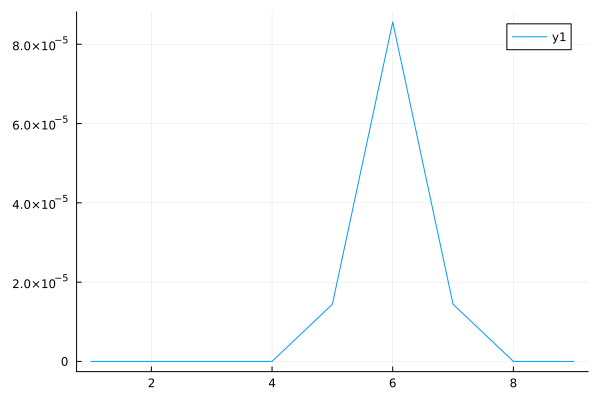

In [60]:
plot(beam0_out[63,60:68])

In [ ]:
phi = phi2.data
# phi.+= 2 * pi
phiout = convert(Matrix{Int64},floor.(((phi.+abs(minimum(phi))) .% (2 * pi) .+ 0.0).*256/(2*pi)))
minimum(phiout), maximum(phiout)



In [3]:
using Plots
plot(beam0.L[1],beam0.data[513,:])

UndefVarError: UndefVarError: `beam0` not defined